In [1]:
amzn = read.csv('500_amzn.csv')
goog = read.csv('500_goog.csv')
library(tm)

Warning message:
"package 'tm' was built under R version 3.5.2"Loading required package: NLP
Warning message:
"package 'NLP' was built under R version 3.5.2"

In [4]:
head(amzn, n = 2)

pg_num,url,pros,cons
50,https://www.glassdoor.com/Reviews/Amazon-com-Reviews-E6036_P50.htm,"You're surrounded by smart people and the projects are interesting, if a little daunting.",Internal tools proliferation has created a mess for trying to get to basic information. Most people are required to learn/understand SQL Database queries to get any actionable data.
50,https://www.glassdoor.com/Reviews/Amazon-com-Reviews-E6036_P50.htm,Brand name is great. Have yet to meet somebody who is unfamiliar with Amazon. Hours weren't as bad as I had previously heard. But i guess can be long for corporate finance,not the most stimulating work. Good brand name to work for but the work itself is mundane as it can get. As a financial analyst you do very little finance.


In [7]:
# Fill NA
amzn <- na.omit(amzn)
goog <- na.omit(goog)

In [8]:
# Print the structure of amzn
str(amzn)

'data.frame':	496 obs. of  4 variables:
 $ pg_num: int  50 50 50 50 50 50 50 50 50 50 ...
 $ url   : Factor w/ 58 levels "https://www.glassdoor.com/Reviews/Amazon-com-Reviews-E6036_P10.htm",..: 44 44 44 44 44 44 44 44 44 44 ...
 $ pros  : Factor w/ 496 levels "- Learn a lot, haven't been bored yet.",..: 477 56 152 349 359 367 183 417 210 352 ...
 $ cons  : Factor w/ 495 levels "#NAME?","*Depending on your manager, might work long hours",..: 156 276 246 89 288 187 374 212 112 165 ...
 - attr(*, "na.action")= 'omit' Named int  76 498 499 500
  ..- attr(*, "names")= chr  "76" "498" "499" "500"


In [9]:
# Create amzn_pros
amzn_pros <- amzn$pros

# Create amzn_cons
amzn_cons <- amzn$cons

In [10]:
# Print the structure of goog
str(goog)

'data.frame':	500 obs. of  4 variables:
 $ pg_num: int  1 1 1 1 1 1 1 1 1 1 ...
 $ url   : Factor w/ 50 levels "https://www.glassdoor.com/Reviews/Google-Reviews-E9079_P1.htm",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ pros  : Factor w/ 492 levels "- Access to a vast wealth of technical resources and people",..: 21 24 486 12 410 233 413 376 314 384 ...
 $ cons  : Factor w/ 491 levels "- Bureaucracy, politics, legal issues, and privacy handling take up more and more time over the years and slow "| __truncated__,..: 17 22 176 6 296 63 453 447 186 113 ...
 - attr(*, "na.action")= 'omit' Named int 231
  ..- attr(*, "names")= chr "231"


In [11]:
# Create goog_pros
goog_pros <- goog$pros

# Create goog_cons
goog_cons <- goog$cons

## TEXT ORGANIZATION

In [13]:
# qdap cleaning function
library(qdap)
qdap_clean <- function(x) {
  x <- replace_abbreviation(x)
  x <- replace_contraction(x)
  x <- replace_number(x)
  x <- replace_ordinal(x)
  x <- replace_symbol(x)
  x <- tolower(x)
  return(x)
}

# tm cleaning function
tm_clean <- function(corpus) {
  tm_clean <- tm_map(corpus, removePunctuation)
  corpus <- tm_map(corpus, stripWhitespace)
  corpus <- tm_map(corpus, removeWords,
                   c(stopwords("en"), "Google", "Amazon", "company"))
  return(corpus)
}

In [14]:
# Define clean function
clean <- function(x) {
  qdap_clean_a <- qdap_clean(x)
  corp <- VCorpus(VectorSource(qdap_clean_a))
  return(tm_clean(corp))
}

In [15]:
amzn_pros_corp <- clean(amzn_pros)
amzn_cons_corp <- clean(amzn_cons)
goog_pros_corp <- clean(goog_pros)
goog_cons_corp <- clean(goog_cons)

In [16]:
## FEATURE EXTRACTION & ANALYSIS: AMZN_PROS

In [17]:
library(RWeka)
tokenizer <- function(x) {
  NGramTokenizer(x, Weka_control(min = 2, max = 2))
}

Warning message:
"package 'RWeka' was built under R version 3.5.2"

In [18]:
# Create amzn_p_tdm
amzn_p_tdm <- TermDocumentMatrix(amzn_pros_corp,
                                 control = list(tokenize = tokenizer))

# Create amzn_p_tdm_m
amzn_p_tdm_m <- as.matrix(amzn_p_tdm)

# Create amzn_p_freq
amzn_p_freq <- rowSums(amzn_p_tdm_m)

Warning message:
"package 'wordcloud' was built under R version 3.5.2"

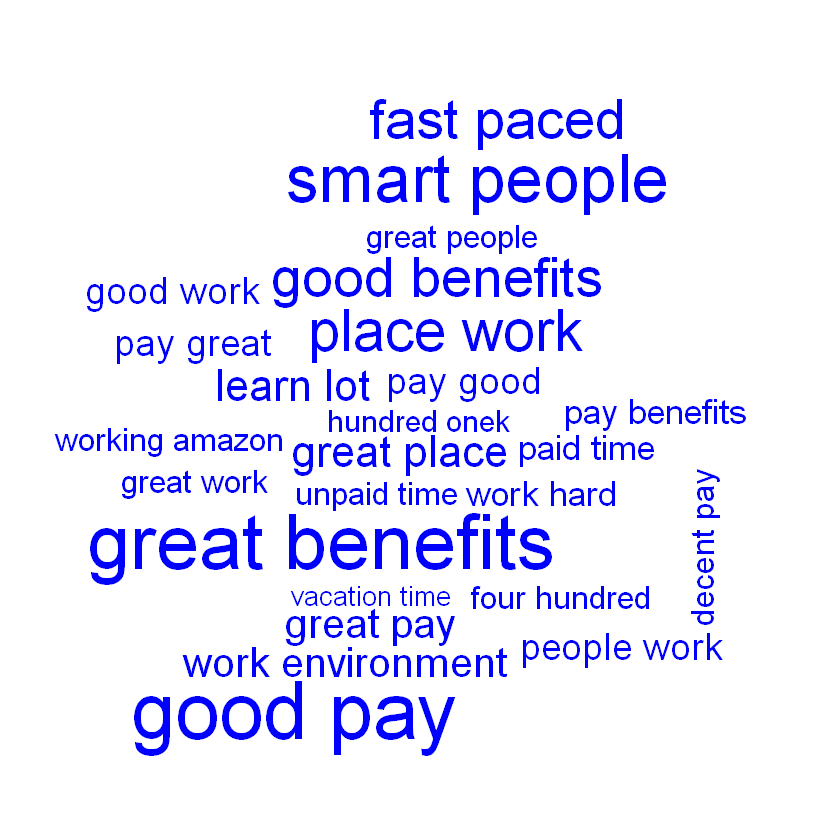

In [19]:
# Plot a wordcloud using amzn_p_freq values
library(wordcloud)
wordcloud(names(amzn_p_freq), amzn_p_freq, max.words = 25, color = "blue")

## FEATURE EXTRACTION & ANALYSIS: AMZN_CONS

In [20]:
# Create amzn_c_tdm
amzn_c_tdm <- TermDocumentMatrix(amzn_cons_corp,
                                 control = list(tokenize = tokenizer))

# Create amzn_c_tdm_m
amzn_c_tdm_m <- as.matrix(amzn_c_tdm)

# Create amzn_c_freq
amzn_c_freq <- rowSums(amzn_c_tdm_m)

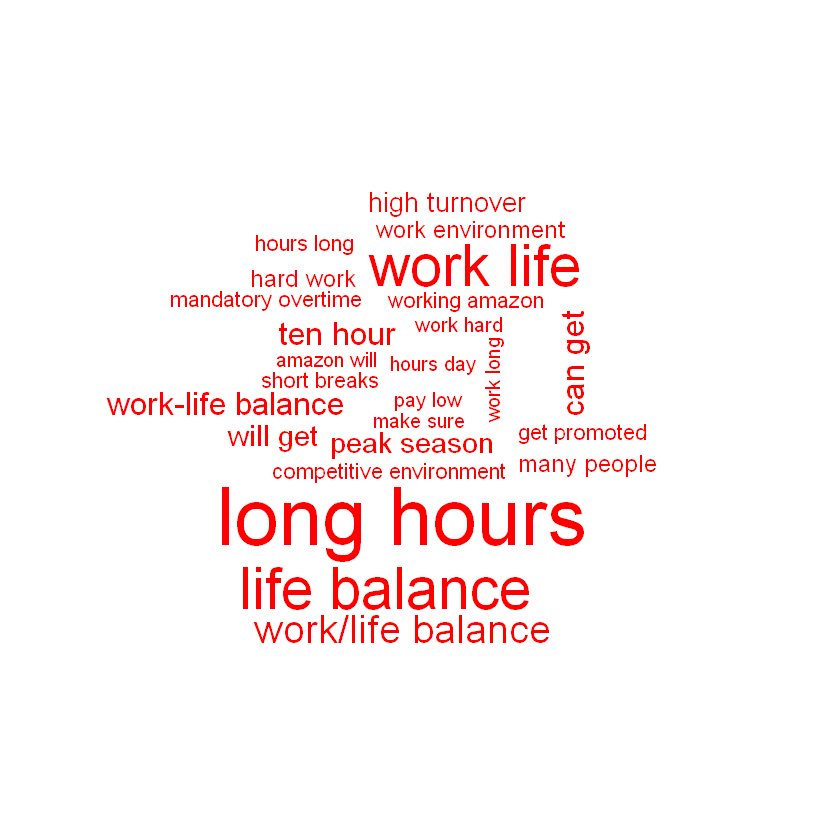

In [21]:
# Plot a wordcloud of negative Amazon bigrams
wordcloud(names(amzn_c_freq), amzn_c_freq, max.words = 25, color = "red")

In [22]:
# Create amzn_c_tdm
amzn_c_tdm <- TermDocumentMatrix(amzn_cons_corp,
                                 control = list(tokenize = tokenizer))

In [23]:
# Print amzn_c_tdm to the console
amzn_c_tdm

<<TermDocumentMatrix (terms: 4830, documents: 496)>>
Non-/sparse entries: 5278/2390402
Sparsity           : 100%
Maximal term length: 32
Weighting          : term frequency (tf)

In [24]:
# Create amzn_c_tdm2 by removing sparse terms 
amzn_c_tdm2 <- removeSparseTerms(amzn_c_tdm, sparse = .993)

# Create hc as a cluster of distance values
hc <- hclust(dist(amzn_c_tdm2, method = "euclidean"), method = "complete")

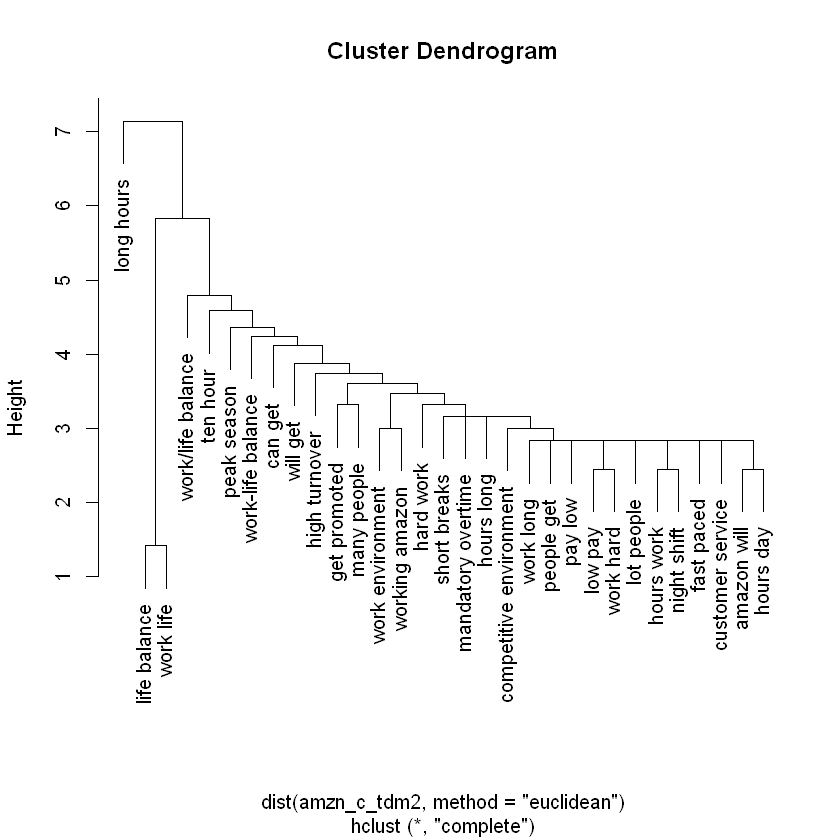

In [26]:
# Produce a plot of hc
plot(hc)

=> there is a strong indication of long working hours and poor work-life balance

## WORD ASSOCIATION

In [27]:
# Create amzn_p_tdm
amzn_p_tdm <- TermDocumentMatrix(amzn_pros_corp,
                                 control = list(tokenize = tokenizer))

# Create amzn_p_m
amzn_p_m <- as.matrix(amzn_p_tdm)

# Create amzn_p_freq
amzn_p_freq <- rowSums(amzn_p_m)

# Create term_frequency
term_frequency <- amzn_p_freq[order(amzn_p_freq, decreasing = TRUE)]

In [28]:
# Print the 5 most common terms
term_frequency[1:5]

good pay great benefits   smart people     place work     fast paced 
            25             24             20             17             16

In [32]:
# Find associations with fast paced
findAssocs(amzn_p_tdm, "fast paced", 0.3)

$`fast paced`
paced environment environments ever        learn fast    paced friendly 
             0.49              0.35              0.35              0.35 
       paced work 
             0.35

## QUICK REVIEW OF GOOGLE

In [33]:
# Create all_goog_corp
all_goog_corpus <- c(paste(goog$pros, collapse = ' '), paste(goog$cons, collapse = ' '))
all_goog_corp <- clean(all_goog_corpus)

# Create all_tdm
all_tdm <- TermDocumentMatrix(all_goog_corp)

# Name the columns of all_tdm
colnames(all_tdm) <- c("Goog_Pros", "Goog_Cons")

# Create all_m
all_m <- as.matrix(all_tdm)

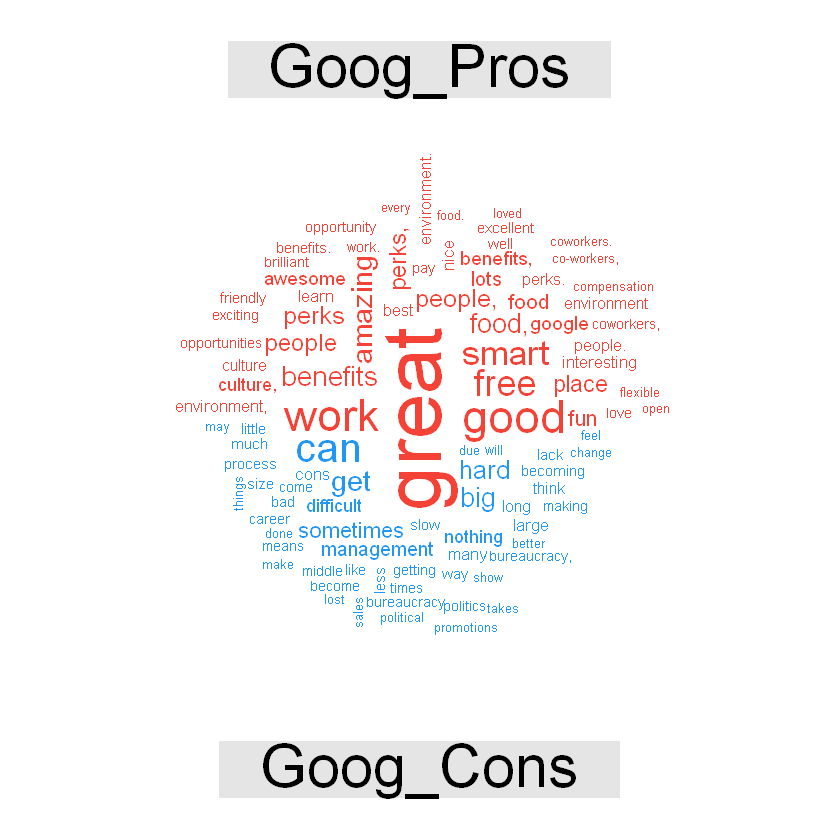

In [34]:
# Build a comparison cloud
comparison.cloud(all_m, 
                 colors = c("#F44336", "#2196f3"), 
                 max.words = 100)

## PYRAMID PLOT (too lazy to do)